In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [99]:
eval_scripts_path = "/mnt/data/Odysseas/Validation_Eval/coco_theo/coco_theo_eval"
COCO_dataset_csv_path = "/mnt/data/Odysseas/Validation_Eval/coco_theo_icarus/COCO_dataset.csv"
THEO_dataset_csv_path = "/mnt/data/Odysseas/mixture_train/theodore_train/dataset.csv"
ICARUS_dataset_csv_path = "/mnt/data/Odysseas/Validation_Eval/coco_theo_icarus_balanced/ICARUS_dataset.csv"

coco_set = pd.read_csv(COCO_dataset_csv_path, header=None)
theo_set = pd.read_csv(THEO_dataset_csv_path, header=None)
icarus_set = pd.read_csv(ICARUS_dataset_csv_path, header=None)

eval_scripts_dir = os.listdir(eval_scripts_path)

coco_precisions = []
fes_precisions = []
icarus_precisions = []
bomni_precisions = []

coco_recalls = []
fes_recalls = []
icarus_recalls = []
bomni_recalls= []

for script in eval_scripts_dir:
    if "COCO" in script:
        csv_path = os.path.join(eval_scripts_path, script, "detectionResultMatrix.csv")
        read_csv = pd.read_csv(csv_path)
        get_index = str.split(script, "_")[-1].zfill(4)
        coco_recalls.append((get_index, np.round(read_csv.iloc[0,-1],2)))
        coco_precisions.append((get_index, np.round(read_csv.iloc[0,-2],2)))
    elif "FES" in script:
        csv_path = os.path.join(eval_scripts_path, script, "detectionResultMatrix.csv")
        read_csv = pd.read_csv(csv_path)
        get_index = str.split(script, "_")[-1].zfill(4)
        fes_recalls.append((get_index, np.round(read_csv.iloc[0,-1],2)))
        fes_precisions.append((get_index, np.round(read_csv.iloc[0,-2],2)))
    elif "ICARUS" in script:
        csv_path = os.path.join(eval_scripts_path, script, "detectionResultMatrix.csv")
        read_csv = pd.read_csv(csv_path)
        get_index = str.split(script, "_")[-1].zfill(4)
        icarus_recalls.append((get_index, np.round(read_csv.iloc[0,-1],2)))
        icarus_precisions.append((get_index, np.round(read_csv.iloc[0,-2],2)))
    elif "WEPDTOF" in script:
        csv_path = os.path.join(eval_scripts_path, script, "detectionResultMatrix.csv")
        read_csv = pd.read_csv(csv_path)
        get_index = str.split(script, "_")[-1].zfill(4)
        bomni_recalls.append((get_index, np.round(read_csv.iloc[0,-1],2)))
        bomni_precisions.append((get_index, np.round(read_csv.iloc[0,-2],2)))

In [100]:
recalls_to_plot = coco_recalls, fes_recalls, icarus_recalls, bomni_recalls
precisions_to_plot = coco_precisions, fes_precisions, icarus_precisions, bomni_precisions

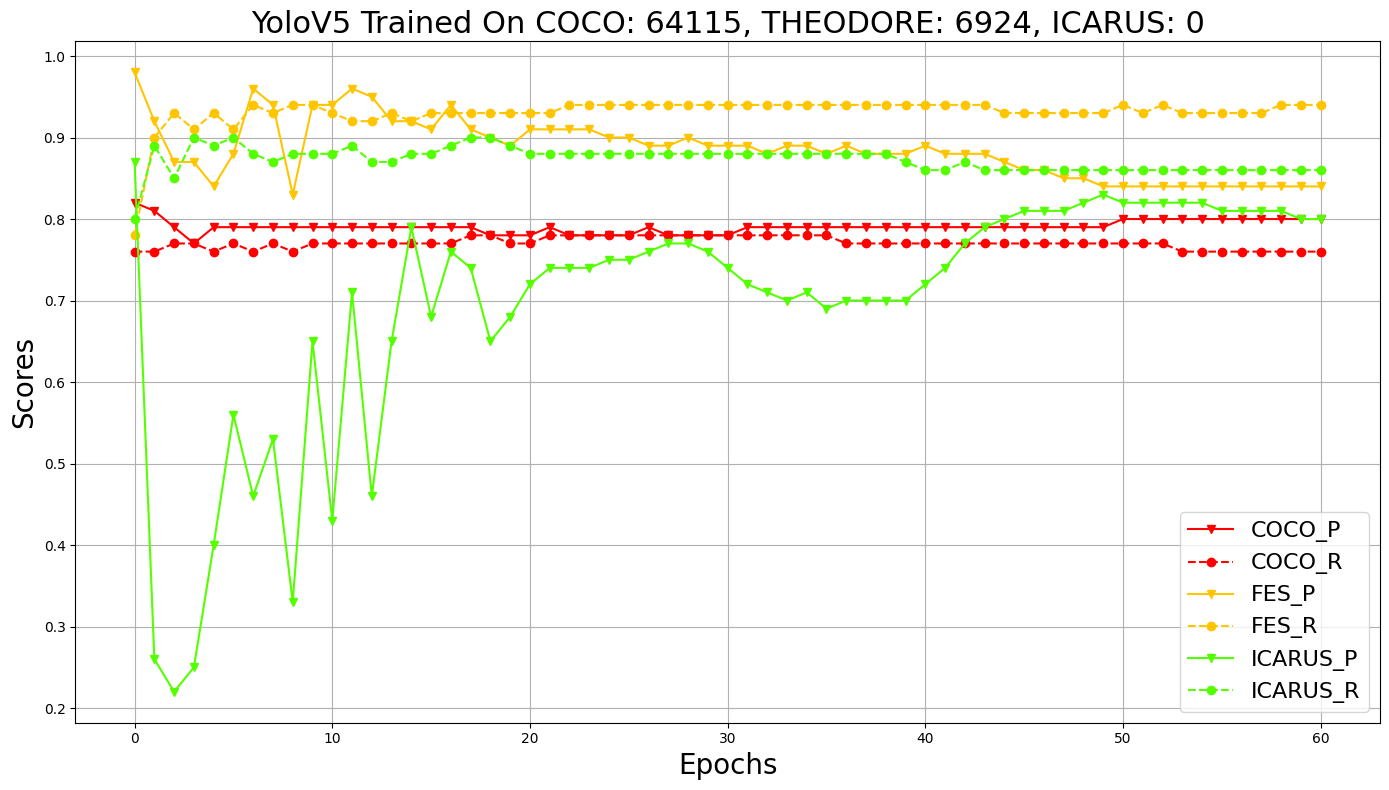

In [101]:
fig = plt.figure(figsize=(14,8))
labels = ["COCO", "FES", "ICARUS", "WEPDTOF"]
colors = plt.get_cmap("prism", 3)
idx = 0
ax = fig.add_subplot(1,1,1)
for (r, p, label) in zip(recalls_to_plot, precisions_to_plot, labels):
    if r:
        r.sort(key=lambda x: x[0])
        p.sort(key=lambda x: x[0])
        arr_p = np.array(p, dtype=np.float32)
        arr_r = np.array(r, dtype=np.float32)
        ax.plot(np.arange(61), arr_p[:,1],"v-" ,label=f"{label}_P", c=colors(idx))
        ax.plot(np.arange(61), arr_r[:,1],"o--" ,label=f"{label}_R", c=colors(idx))
        plt.legend(prop={'size':16})
        idx+=1
    # plt.ylim((0.5, 1))
    plt.xlabel("Epochs", fontsize=20)
    plt.ylabel("Scores", fontsize=20)
    plt.title(f"YoloV5 Trained On COCO: {coco_set.shape[0]}, THEODORE: {theo_set.shape[0]}, ICARUS: 0").set_size(22)

plt.tight_layout()
plt.grid()
plt.savefig("/mnt/data/Odysseas/Validation_Eval/coco_theo/precision_recall_last_point.png")
plt.show()
